# What is Parkinson's Disease?
Parkinson's Disease is a neurodegenerative disorder that affects dopamine-producing neurons in the brain. It has 5 stages to it, and is a progessive disorder of the central nervous system affecting movement and inducing tremors and stiffness.

# **![](http://)Install the XGBoost to use the XGB Classifier**
XGBoost is a Machine Learning algorithm

In [ ]:
pip install numpy pandas sklearn xgboost

Important Imports

In [ ]:
import numpy as np #linear alg
import pandas as pd #data processing
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

read the Datafile as df and show the first 5 rows

In [ ]:
df = pd.read_csv("../input/parkinsons/parkinsons.txt")
#get a copy to avoid changing the original data
data = df.copy()
df.head()

In [ ]:
df

when reading the first and last 5 outputs, looking at the status columns, it gives an output of 1 and 0s. This will be taken into consideration when splitting the data.

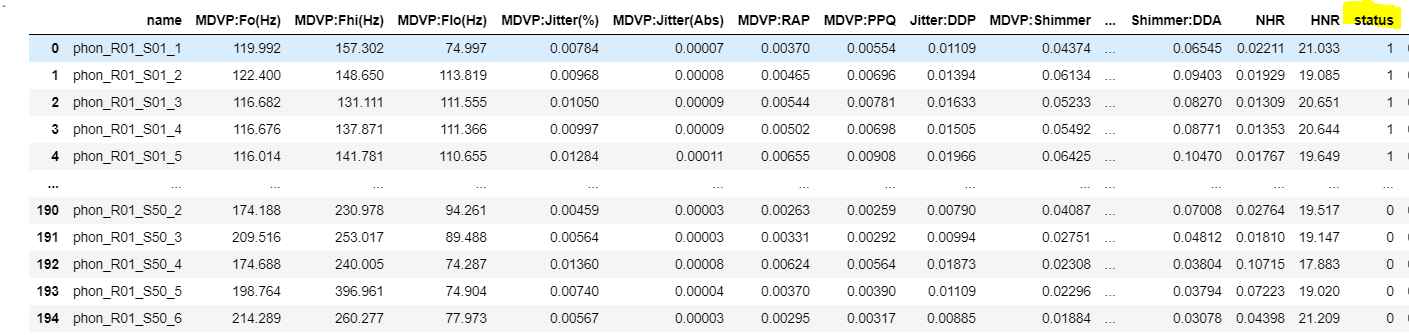

Read every column except status since this might interfere with the accuracy
Use it later on

In [ ]:
#locate every column except 'status'
using = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

Here, use labels ('status') to do the testing. This will tell you if the person we're testing has parkinson's dieases or not. We use this column for testing since in the dataset, 'status' already tells us if the person has the disease or not

scale to normalize

In [ ]:
#DataFlair - Scale the features to between -1 and 1
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(using)
y = labels

Keep 20% of the data for validation testing purposes

In [ ]:
#split the data set into 8:2 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 7)


Here we will train the model using the training data (x_train and y_train) 
fitting the model with the 2 informations will train the model 

In [ ]:
df.hist(figsize=(28,28))

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() ,annot=True)
plt.show()

In [ ]:
#train the model using the XGB classifier
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
#Calculate the accuracy using accuracy learning
y_pred = model.predict(X_val)
print("XGBClassifer : ")
print(accuracy_score(y_val, y_pred) * 100)
print("")

# Other Methods

Sequential

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
feature = data.drop(['name'], axis = 1)

feature = feature.drop(['status'], axis = 1)
X_2 = feature
y_2 = data['status']

In [ ]:
#split the data set into 8:2 ratio
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2, y_2, test_size = 0.25, random_state = 7)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_2_train)
X_2_train = scaler.transform(X_2_train)
X_2_test = scaler.transform(X_2_val)

In [ ]:
classifier = Sequential(
    #First Hidden Layer
    Dense(16, activation= 'relu', kernel_initializer = 'random_normal', input_dim = 22),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    #Second  Hidden Layer
    Dense(8, activation= 'relu', kernel_initializer = 'random_normal'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    #Output Layer
    Dense(1, activation= 'sigmoid', kernel_initializer = 'random_normal'),
)

#Compiling the neural network
classifier.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)

#Fitting the data to the training dataset
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
tscores = classifier.evaluate(X_2_val, y_2_val)
print("Test Accuracy: %.2f%%" %(tscores[1]*100))

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(
    class_weight=None, criterion='entropy', max_depth=20,
    max_features=None, max_leaf_nodes=None,
    min_impurity_split=1e-07, min_samples_leaf=6,
    min_samples_split=1, min_weight_fraction_leaf=0.0,
    presort=False, random_state=7, splitter='best'
)

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_2_train, y_2_train)
y_pred = rfcl.predict(X_2_val)
rfcl.score(X_2_val , y_2_val)